# Pymaceuticals Inc.
---

### Analysis

   Data analysis was performed based on two databases - Study_results.csv and Mouse_metadata.csv. 
Study_results.csv file contained the following data: "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites". Mouse_metadata.csv file contained the following data: "Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)".
The analysis examined the effect of treatment with different drugs on tumor volume in mice and allowed the following conclusions to be drawn:

- Based on given data, a correlation can be observed between the weight of the mice and the size of the tumor with Capomulin treatment. It appears that there is a positive correlation between the weight of the mice and the tumor volume: as the weight of the mice increases, the tumor volume also tends to increase. The relationship is visualized on a chart titled "Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)". 
A positive correlation does not always mean a cause-and-effect relationship and in this case, more research should be carried out to establish this relationship and answer what is the cause and what is an effect. 

- In the study of mouse m957, after starting treatment with Capomulin, there was initially a slight increase in tumor volume to below 2 mm3 between day 0 to 10. Subsequently, there was a sharp decrease in tumor volume from around 45 mm3 at the starting point on day 0 to about 33.5 mm3 at the last measurement on day 45. This means that capomulin led to a significant reduction in tumor volume in mouse m957 after the initial increase. The relationship is visualized on a chart titled "Tumor Volume vs. Time Point for Mouse m957 (Capomulin Treatment)". 
This observation shows that Capomulin effectively reduces tumor size in mice and it is worth conducting further research on it, perhaps in larger animals or mammals.

The collected data have certain limitations that may affect the final effect of the analysis, and these are:    

- The number of mice that took part in the study may turn out to be insufficient to draw conclusions for the population based on their results.
- The mice participating in the study may have had individual differences that could affect their response to treatments.
- The study may not have covered a long enough period to observe the full effects of the treatments on tumor growth or other outcomes.

In order to find out the true effectiveness of the drug Capomulin, it would be necessary to continue research and check, for example:

- Capomulin Long-Term Treatment Effects Study: Conducting a long-term study that includes a longer period of treatment and follow-up to assess the durability of treatment effects on tumor growth and other health indicators.

Therefore, this analysis shows that the drug Capomulin significantly reduced tumor size in mice and it is worth continuing research on it.


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
mice_value = len(combined_data["Mouse ID"].unique())
mice_value

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse = duplicate_mice['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data[combined_data["Mouse ID"] != 'g989']

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice2_value = len(clean_df["Mouse ID"].unique())
mice2_value

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_reg = clean_df.groupby('Drug Regimen')
mean_tumor_volume = drug_reg['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_reg['Tumor Volume (mm3)'].median()
variance_tumor_volume = drug_reg['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = drug_reg['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_reg['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Std. Dev. Tumor Volume': std_dev_tumor_volume,
    'SEM Tumor Volume': sem_tumor_volume
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Variance Tumor Volume', 'std': 'Std. Dev. Tumor Volume', 'sem': 'SEM Tumor Volume'})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

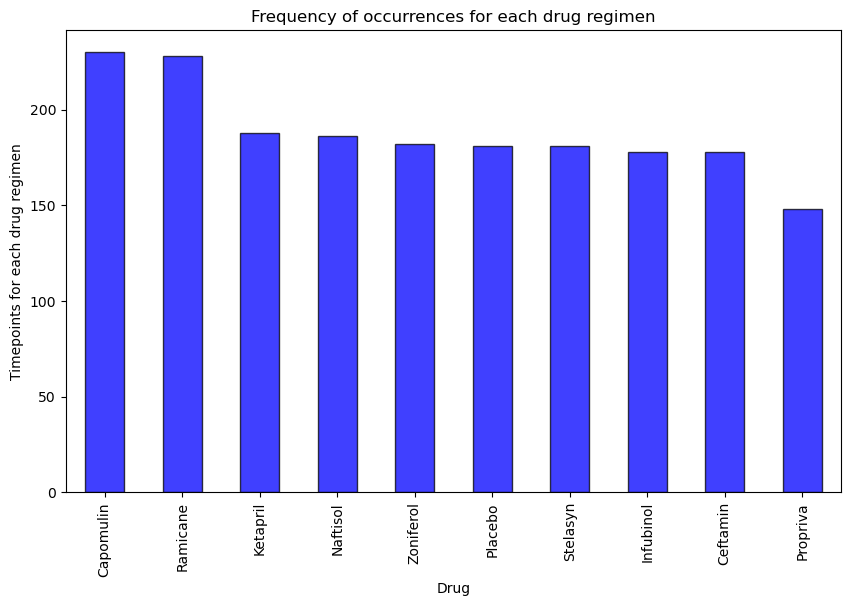

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha =0.75)

plt.title('Frequency of occurrences for each drug regimen')
plt.xlabel('Drug')
plt.ylabel('Timepoints for each drug regimen')

plt.show()

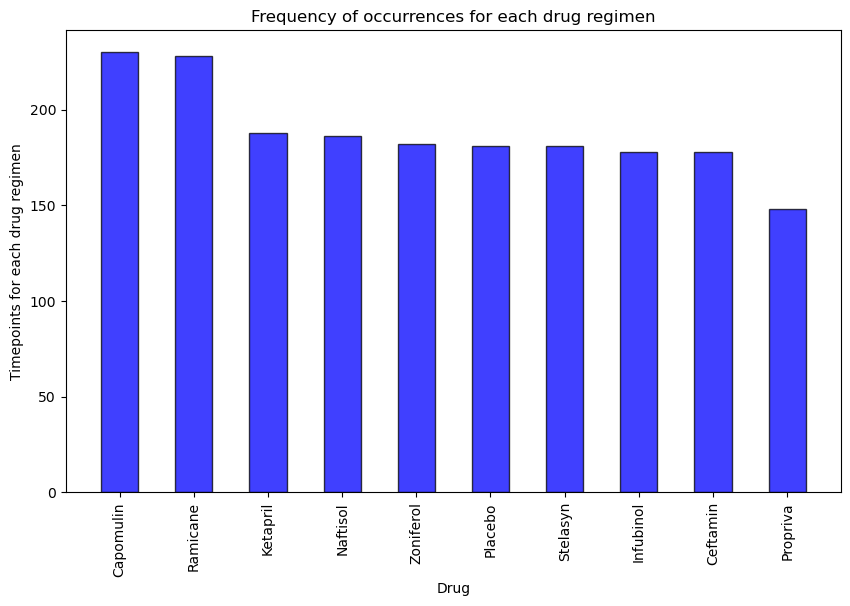

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='blue', edgecolor='black', alpha=0.75, width=0.5)
plt.xticks(rotation=90)  
plt.title('Frequency of occurrences for each drug regimen')
plt.xlabel('Drug')
plt.ylabel('Timepoints for each drug regimen')
plt.show()

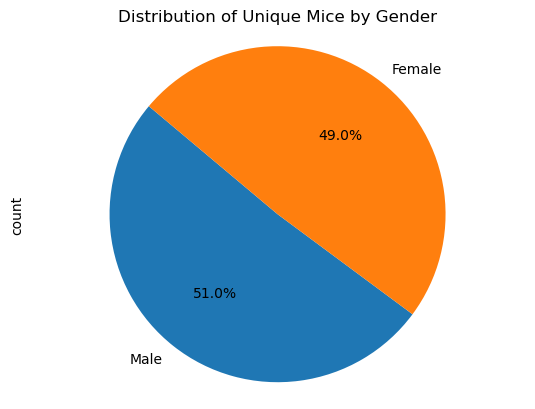

In [34]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = clean_df["Sex"].uniq()
f_versus_m = gender_counts.plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribution of Unique Mice by Gender")

plt.show()

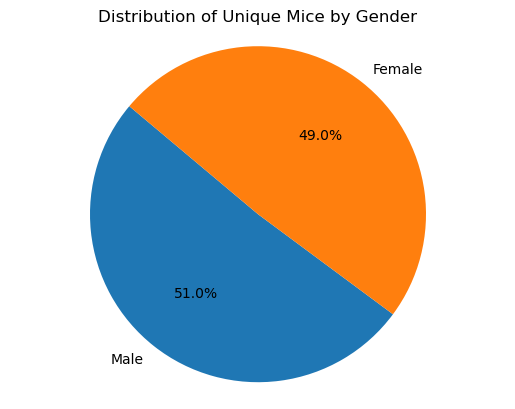

In [24]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

f_versus_m = clean_df["Sex"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribution of Unique Mice by Gender")

# Get the unique mice with their gender

unique_mice = clean_df.groupby(["Mouse ID", "Sex"]).size().reset_index(name='Count')

# Make the pie chart

plt.show()



## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

merged_df = pd.merge(max_timepoints, clean_df, on=["Mouse ID", "Timepoint"], how="inner")

capomulin_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]
ramicane_df = merged_df[merged_df["Drug Regimen"] == "Ramicane"]
infubinol_df = merged_df[merged_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = merged_df[merged_df["Drug Regimen"] == "Ceftamin"]

capomulin_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
#Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

outliers = {}

for treatment in treatments:
    treatment_data = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    if not potential_outliers.empty:
        outliers[treatment] = potential_outliers.iloc[0]
     
        subset_data = merged_df.loc[(merged_df["Drug Regimen"] == treatment) & ((merged_df["Tumor Volume (mm3)"] < lower_bound) | (merged_df["Tumor Volume (mm3)"] > upper_bound))]
        outliers[treatment + "_subset"] = subset_data
    
    print(f"{treatment} potential outliers can be values less than {lower_bound} and more than {upper_bound}.")

print("First potential outlier for each treatment:")
print(outliers)



Capomulin potential outliers can be values less than 20.70456164999999 and more than 51.83201549.
Ramicane potential outliers can be values less than 17.912664470000003 and more than 54.30681135.
Infubinol potential outliers can be values less than 36.83290494999999 and more than 82.74144559000001.
Ceftamin potential outliers can be values less than 25.355449580000002 and more than 87.66645829999999.
First potential outlier for each treatment:
{'Infubinol': 36.3213458, 'Infubinol_subset':    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
31     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
31           36.321346                 0  }


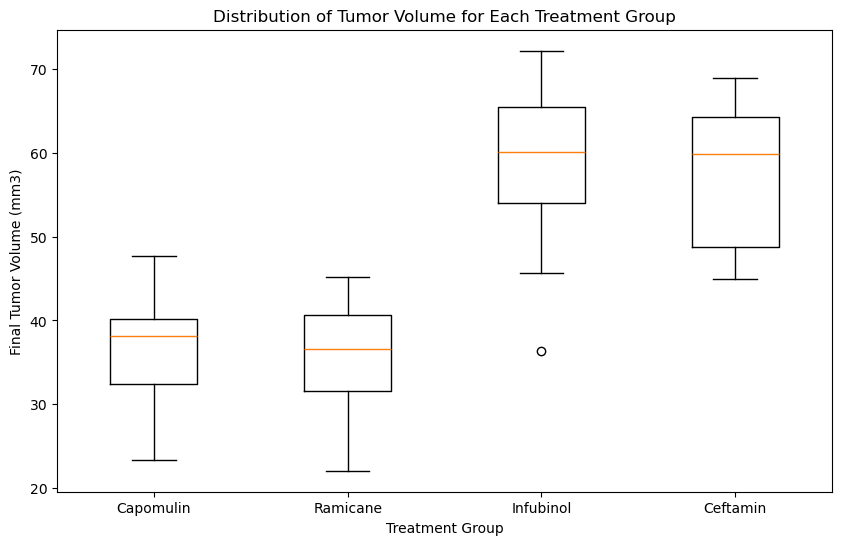

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_df = merged_df.groupby('Drug Regimen')

tumor_vol_data = [treatment_df.get_group(treatment)['Tumor Volume (mm3)'].values for treatment in treatments]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

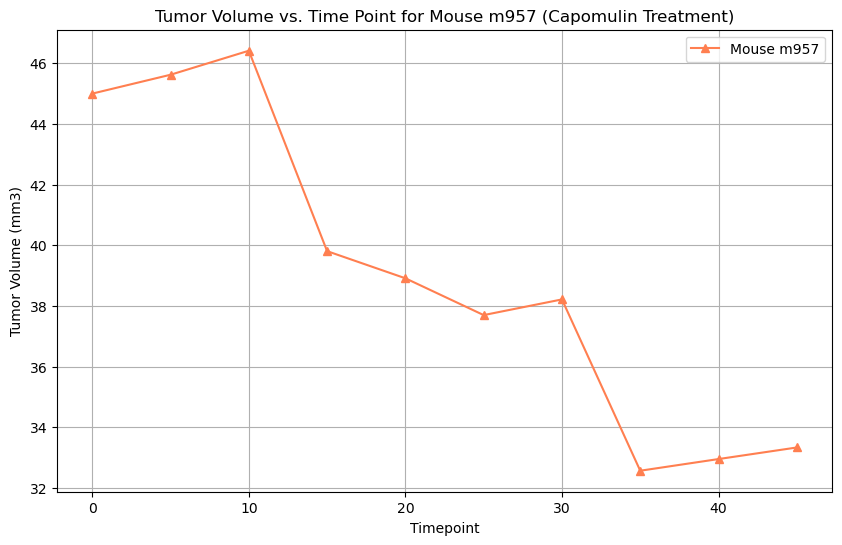

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import random

single_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()
choosen_mouse_id = random.choice(single_mouse)
mouse_data = clean_df[(clean_df["Mouse ID"] == choosen_mouse_id) & (clean_df["Drug Regimen"] == "Capomulin")]

x_axis = mouse_data["Timepoint"]
y_axis = mouse_data["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, marker='^', color='coral', label=f"Mouse {choosen_mouse_id}")
plt.title(f"Tumor Volume vs. Time Point for Mouse {choosen_mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()

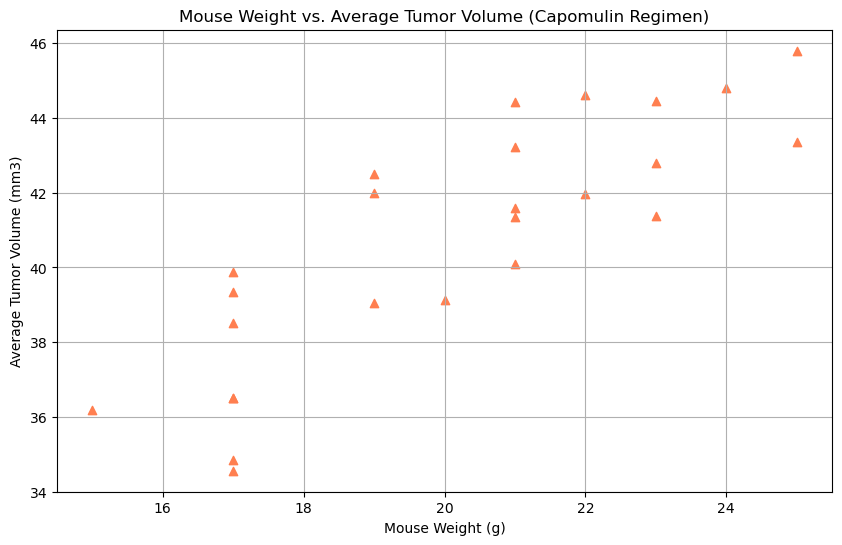

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_vol = clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Calculate the average weight for each mouse in the Capomulin regimen
avg_weight = clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_vol, color='coral', marker='^')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

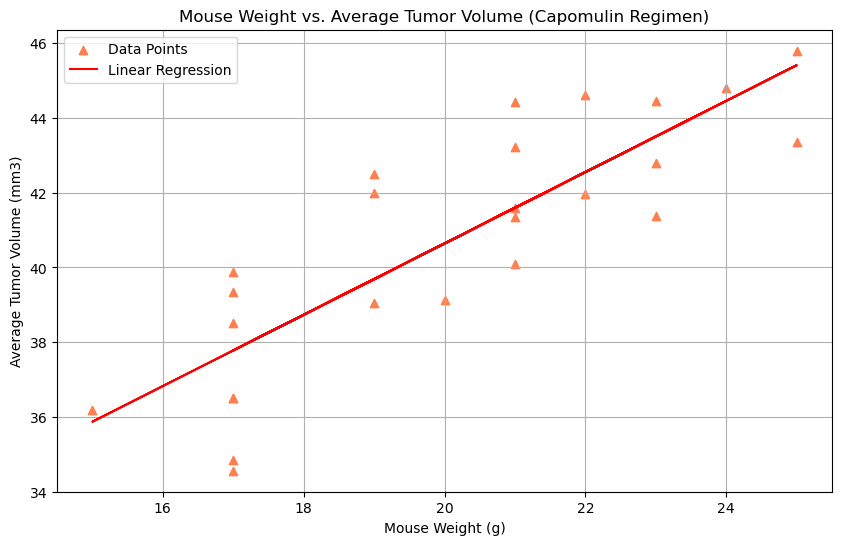

Correlation Coefficient: 0.84
Linear Regression Equation: y = 0.95x + 21.55


In [31]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
correlation_coef = avg_weight.corr(avg_tumor_vol)

slope, intercept, r_value, p_value, std_err = linregress(avg_weight, avg_tumor_vol)

# Create the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate the scatter plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_vol,marker='^', color='coral', label='Data Points')
plt.plot(avg_weight, slope * avg_weight + intercept, color='r', label='Linear Regression')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Correlation Coefficient: {correlation_coef:.2f}")
print(f"Linear Regression Equation: {regression_eq}")